In [492]:
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [493]:
G = 0.1
dt = 0.01

In [558]:
class Item:
    def __init__(self, m: float, r0: np.ndarray, v0: np.ndarray):
        self.m = m
        self.v = v0
        self.r = r0
        self.history = np.array(self.r, dtype=np.float)

    def __str__(self):
        return 'mass:{}, Coordinates{}'.fromat(np.round(self.m, 2), np.round(self.r0, 2))

    def kin(self):
        return self.m * np.linalg.norm(self.v) ** 2 / 2


def full_energy(items):
    energy = 0.
    for i in items:
        energy += i.kin()

    for j in range(len(items)):
        flg = j+1
        while flg < len(items):
            energy += - G * items[j].m * items[flg].m / np.linalg.norm(items[j].r - items[flg].r)
            flg+=1

    return np.fabs(energy)

In [544]:
def step(items):
    for i in range(len(items)):
        for j in range(len(items)):
            if j != i:
                dv = -dt * G * items[j].m * (items[i].r - items[j].r) / np.linalg.norm(items[i].r - items[j].r) ** 3
                items[i].v += dv

    for i in items:
        i.r += i.v * dt
        i.history = np.vstack((i.history, i.r))

In [576]:
def test_зсэ(items, k, stop):
    o = full_energy(items)
    cnt = 0
    print(np.fabs(full_energy(items) - o))
    while (np.fabs(full_energy(items) - o) < o * k) and (cnt < stop):
        cnt += 1
        step(items)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    for x in items:
        ax.scatter(x.history[:, 0], x.history[:, 1], x.history[:, 2])
    print(cnt)

0.0
1000


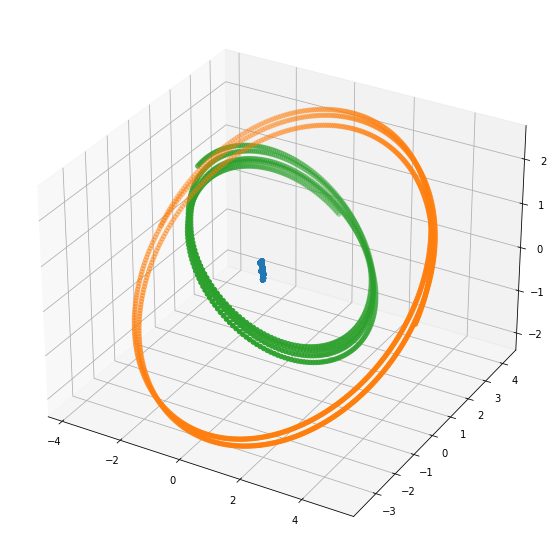

In [580]:
b1 = Item(2000, np.random.rand(3) * 0, np.random.rand(3) * 0)
b2 = Item(10, np.array([5., 0., 0]), np.array([0., 5., 3.]))
b3 = Item(10, np.array([0., 4., 0]), np.array([-5., 0., 3.]))
it = [b1, b2, b3]
test_зсэ(it, 0.01, 1000)

0.0
300


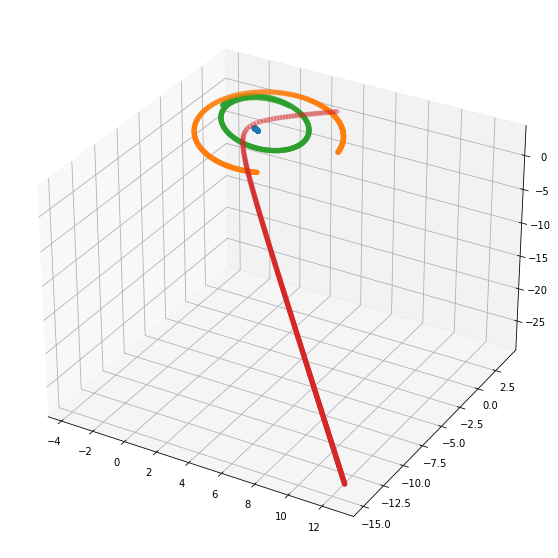

In [578]:
b1 = Item(2000, np.random.rand(3) * 0, np.random.rand(3) * 0)
b2 = Item(10, np.array([5., 0., 0]), np.array([0., 5., 3.]))
b3 = Item(10, np.array([0., 4., 0]), np.array([-5., 0., 3.]))
b4 = Item(10, np.array([3., 4., 1]), np.array([-10., -10., 0.]))
it = [b1, b2, b3, b4]
test_зсэ(it, 6, 300)

In [557]:
full_energy(it)

-60.0
-460.0
-inf


<ipython-input-556-14bd7dc792a9>:23: RuntimeWarning: divide by zero encountered in double_scalars
  energy += - G * items[j].m * items[flg].m / np.linalg.norm(items[j].r - items[flg].r)


inf

In [534]:
b3.history

array([5., 0., 0.])